Life Cycle of ML Projects

* Understanding Problem Statement
* Data Collection
* Data Cleaning
* EDA
* Data Pre Processing
* Model Training
* Best fit model

# 1) Problem Statement

All Across Globe because of changing Environment condition , Global Warming , Deforestation and many more reasons there is 
unpresidented rise in Forest Fire around us leading to situation getting more worsh . So by help of Algerian Dataset forest 
Prediction we will try to find out condition which can lead to forest fire , so that we can take action before reaction.

# 2) Data Collection

* Data is collected from UCI repository , further stored in Git(link) - https://raw.githubusercontent.com/Amritrajdubey/Algerian_forest_dataset/main/Algerian_forest_fires_dataset_UPDATE.csv 
* Data consist of 246 Rows and 14 Column

* Importing necessary library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

* Importing the Dataset 

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Amritrajdubey/Algerian_forest_dataset/main/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

* Shape of Dataset

In [4]:
df.shape

(246, 14)

* Top 5 Rows

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


* Columns in the dataset

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

* Attribute information

In [7]:
df.shape

(246, 14)

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Temp : temperature (temperature max) in Celsius degrees: 22 to 42
        
RH : Relative Humidity in %: 21 to 90
        
Ws :Wind speed in km/h: 6 to 29
        
Rain: total day in mm: 0 to 16.8
        
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    
Drought Code (DC) index from the FWI system: 7 to 220.4
    
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    
Buildup Index (BUI) index from the FWI system: 1.1 to 68
    
Fire Weather Index (FWI) Index: 0 to 31.1
    
Classes: two classes, namely 'Fire' and 'not Fire'.

* Stripping unnecessary space from column name

In [9]:
df.columns = df.columns.str.strip()

* Info of Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


* Summary of Dataset

In [11]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


# Data Cleaning

* In dataset all columns have int or float datatype . Thus checking for object datatype in the dataset.

In [12]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [13]:
df[~df.day.str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Thus above two rows only contain object datatype in day column and even row no 122 is having NAN value in each column. Thus we will drop both.

* Droping row no 122 and 123

In [14]:
df1 = df.copy()

In [15]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [16]:
df1 = df.drop(df.index[[122,123]])

In [17]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [18]:
df1.shape

(244, 14)

In [19]:
# Checking for object data in day column 

df1[~df1.day.str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Converting data type of columns according to thr values .
int data type - day , month , year , Temperature , RH , WS
Float data type - Rain , FFMC , DMC , DC , ISI , BUI , FWI
Object data type - Classes

* Converting object to int data type

* Validating unique data present in each columns and removing unnecessary spaces.

In [20]:
df1[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df1[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

* Eliminating space b/w below DC column row .

In [21]:
df1['DC'] = df1['DC'].str.replace('14.6 9','14.69')

* Replacing 'fire   ' present in row of FWI column with mode of corresponding column.

In [22]:
df1['FWI'] = df1['FWI'].str.replace('fire   ',df1['FWI'].mode()[0])

* Converting datatype of column to float.

In [23]:
df1[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df1[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

* Unique values of classes column 

In [24]:
df1.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

* Standardizing the values .

In [25]:
df1.Classes = df1.Classes.str.strip()

In [26]:
df1.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

* Converting Classes categorical value to numerical.

In [27]:
df1['Classes'] = df1['Classes'].str.replace('not fire','1')
df1['Classes'] = df1['Classes'].str.replace('fire','0')

* Check for category except fire , not fire in Classes

In [28]:
df1['Classes'][160:170]

162      0
163      1
164      1
165      0
166      0
167    NaN
168      0
169      0
170      0
171      0
Name: Classes, dtype: object

* Replcaing NaN of a cloumn with mode using index method

In [29]:
df1.loc[167,'Classes'] = df1['Classes'].mode()[0]

* Converting Classes datatype

In [30]:
df1['Classes'] = df1['Classes'].astype(int)

* dropping the year column as year is same throughout.

In [31]:
df1 = df1.drop(['year'],axis = 1)

In [32]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


* Describing data once again

In [33]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [34]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,-0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,-0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,-0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,-0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,-0.584188
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,-0.507132
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054,-0.735511


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820178eb80>,
      dtype=object)

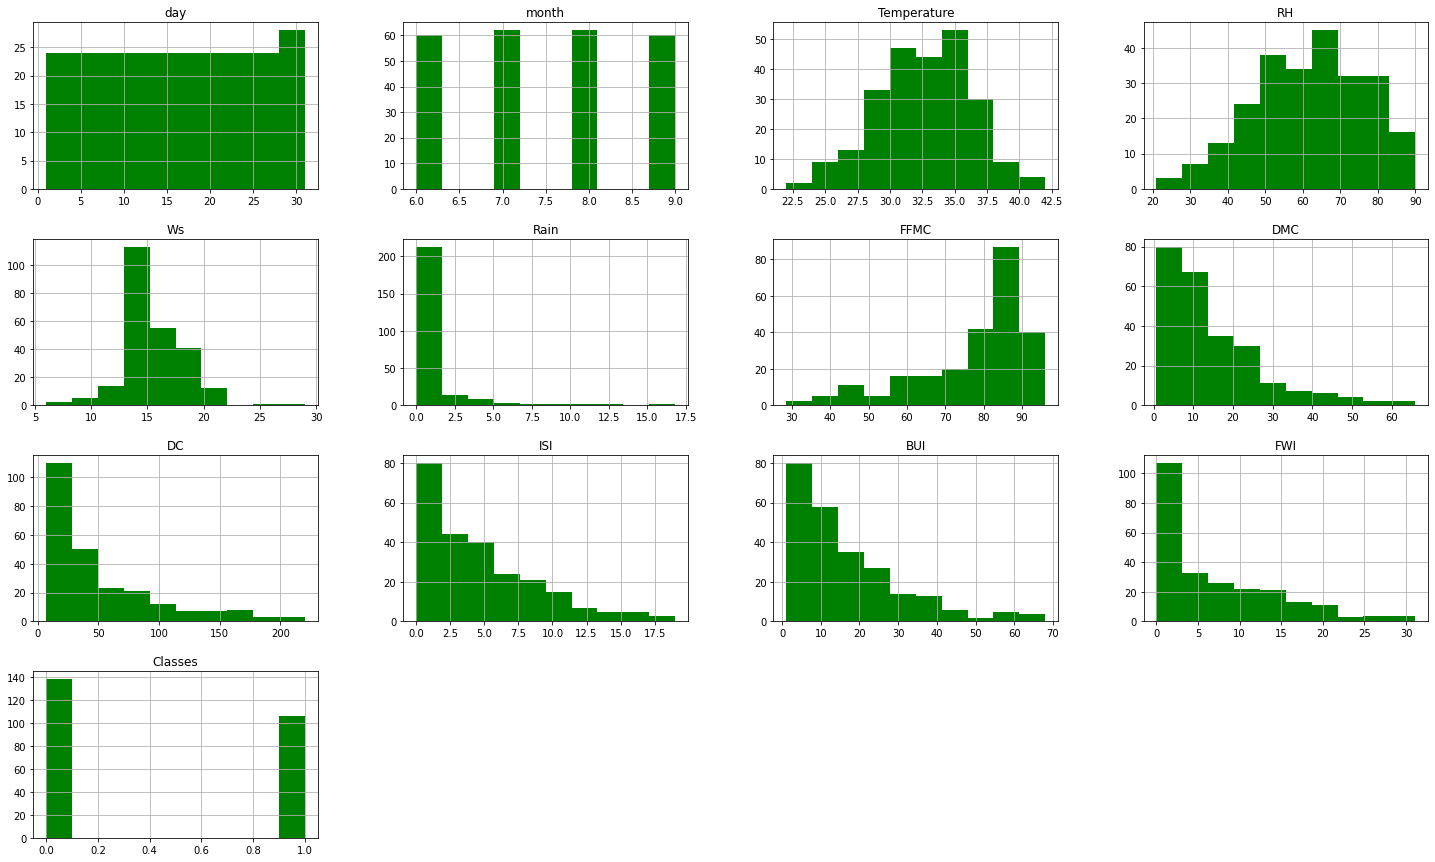

In [35]:
df1.hist(figsize=(25,15),color = 'g')

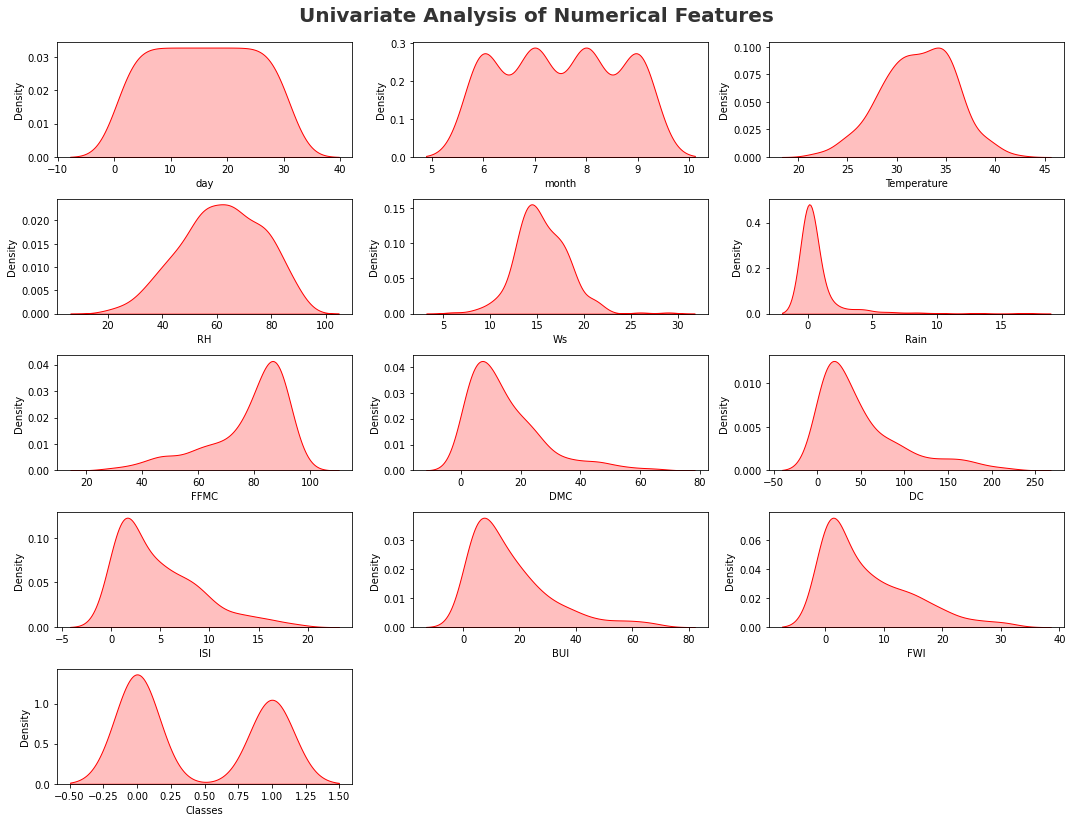

In [36]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(0, len(df1.columns)):
    plt.subplot(7, 3, i+1)
    sns.kdeplot(x=df1[df1.columns[i]],shade=True, color='r')
    plt.xlabel(df1.columns[i])
    plt.tight_layout()

* Rain , DMC , DC , ISI , BUI , FWI are left skwied .
* FFMC is right skwied .


# Bivariant Analysis

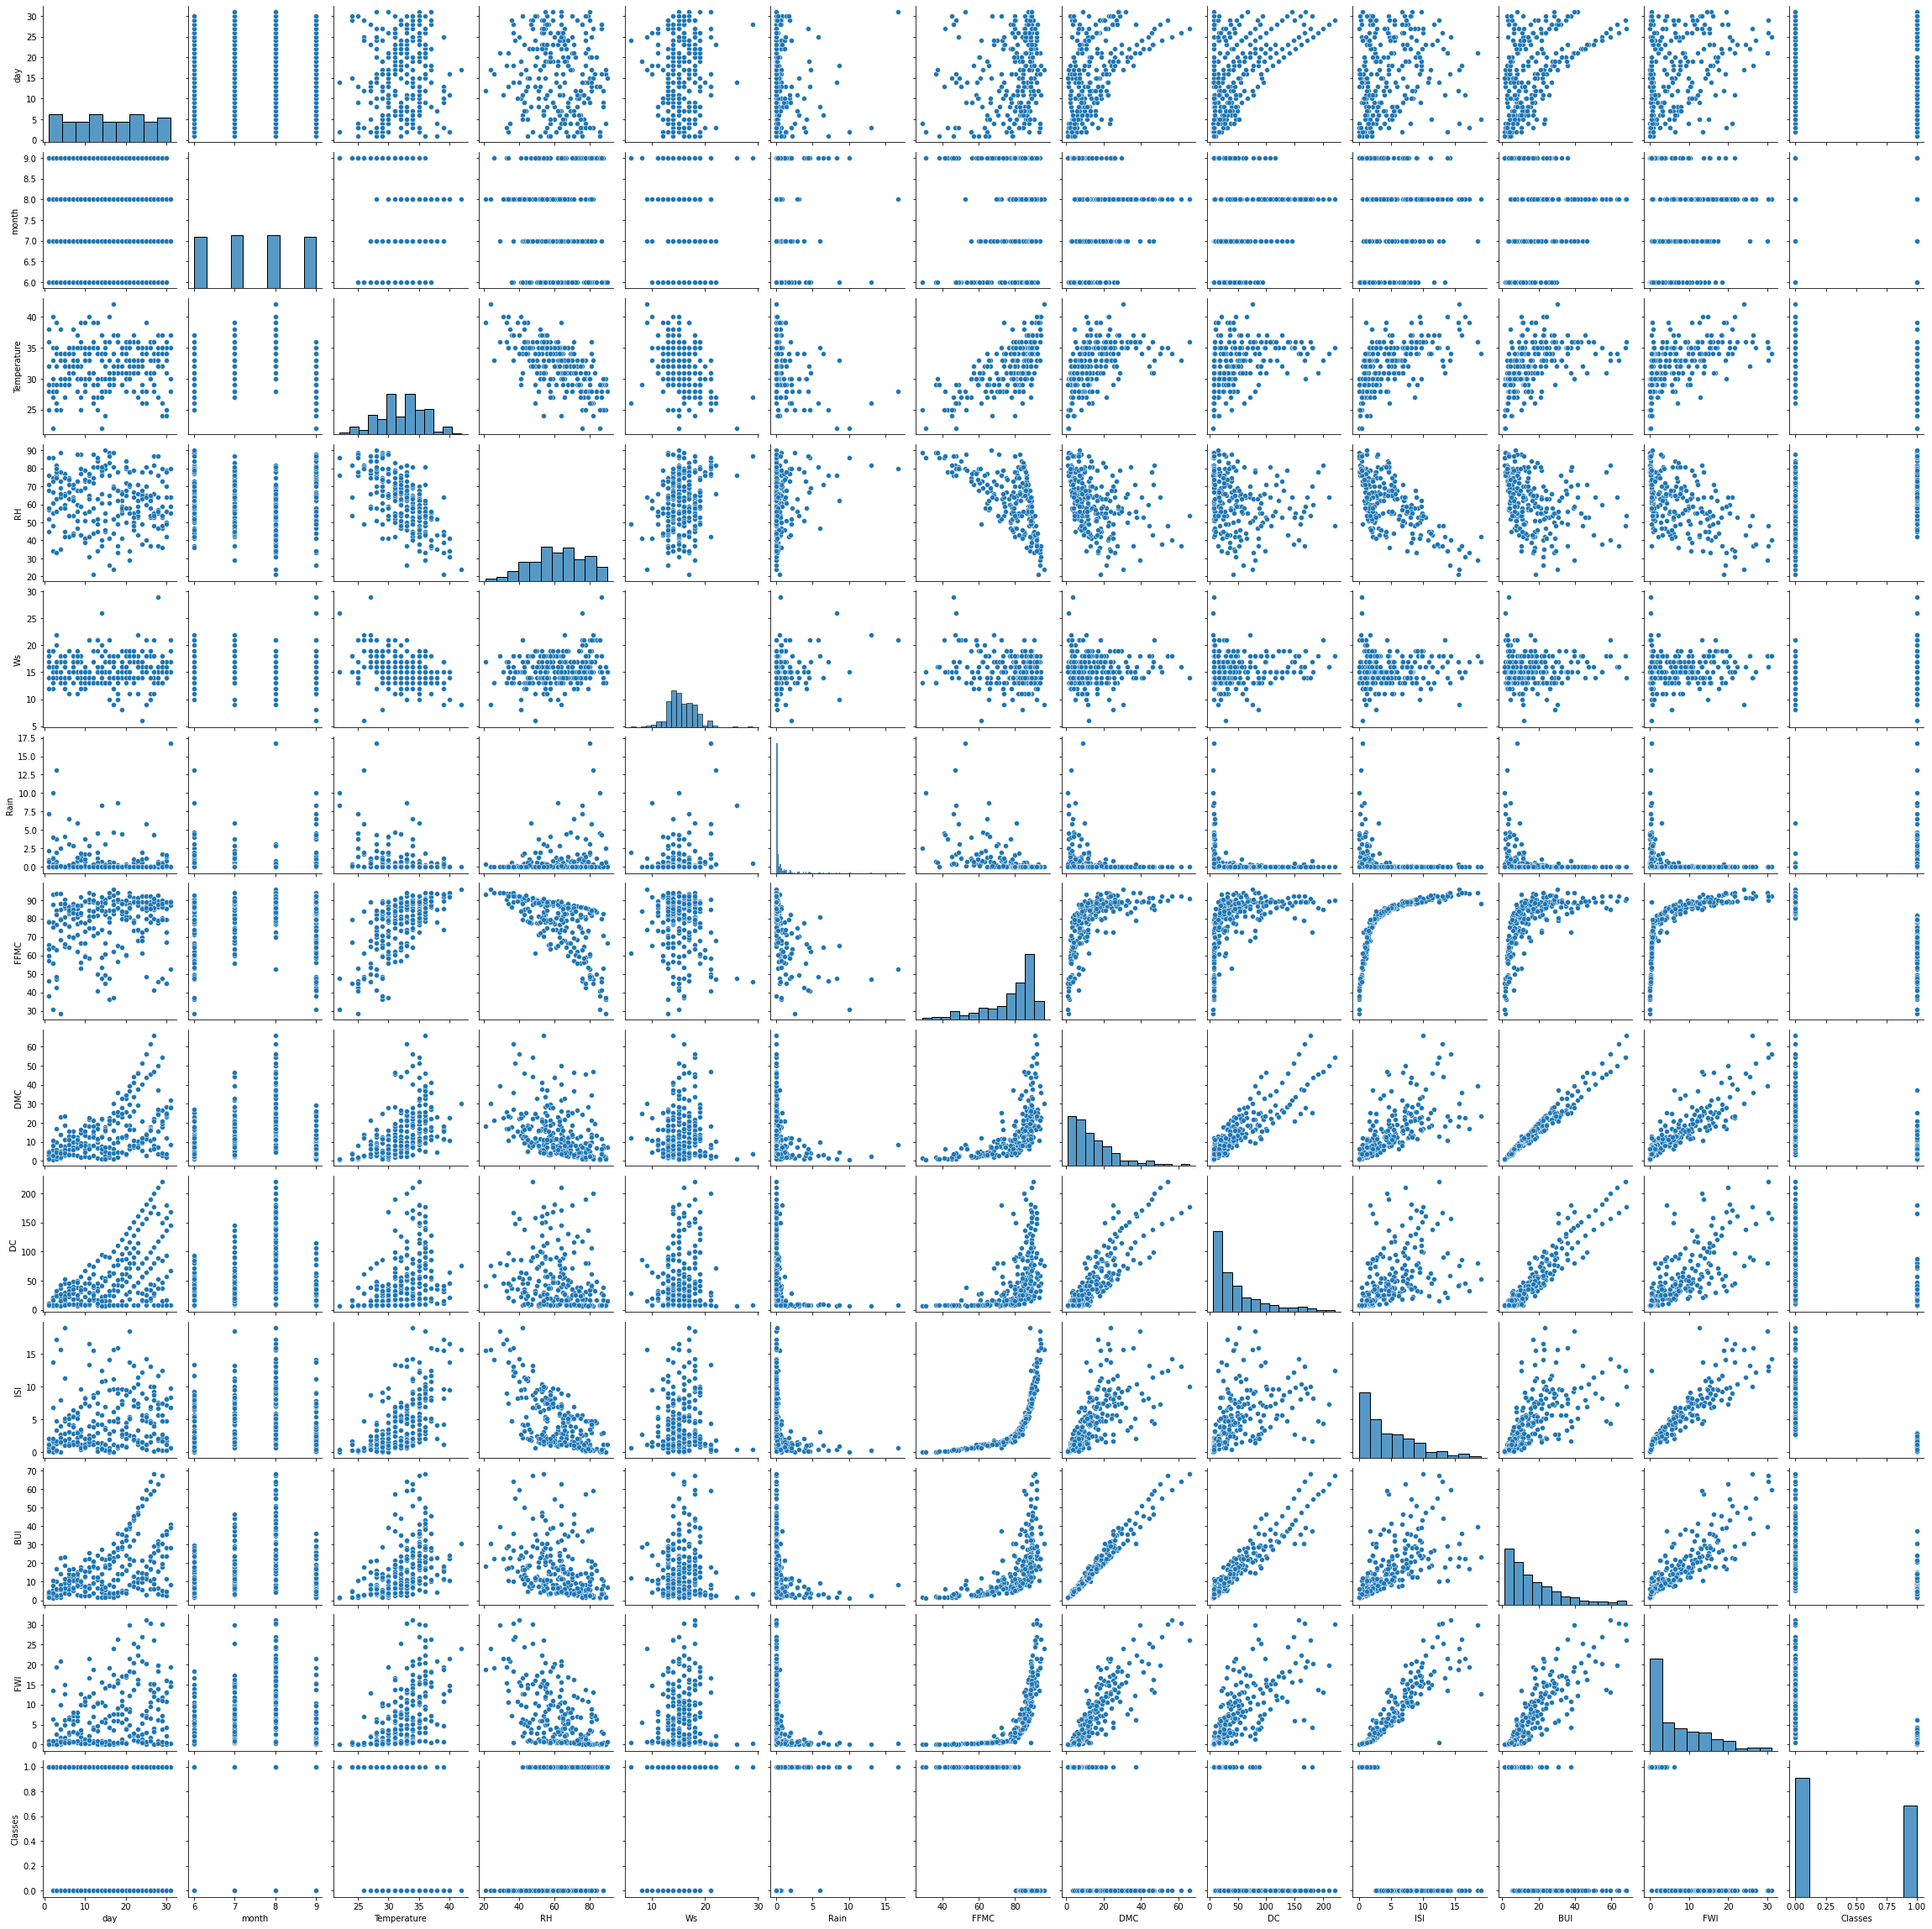

In [37]:
sns.pairplot(df1)

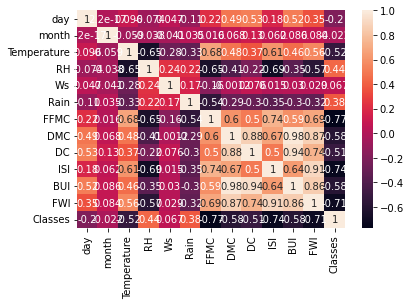

In [38]:
#sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot = True)

RH and Rain is Negative correlated with Temp , FFMC , DMC , DC , ISI , BUI and FWI

RH and Rain are positive Correlated with eachother .


* Plotting scatter plot of various category wrt to temperature change

Text(0, 0.5, 'Temperature')

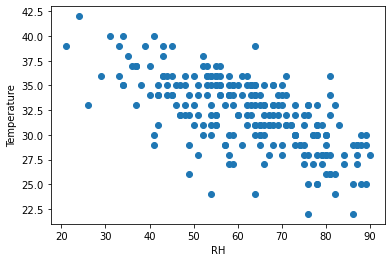

In [38]:
plt.scatter(df1['RH'],df1['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

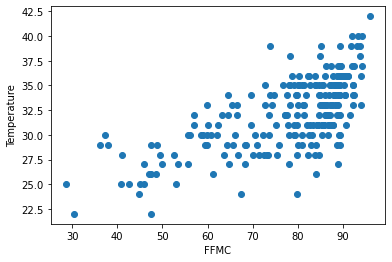

In [39]:
plt.scatter(df1['FFMC'],df1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

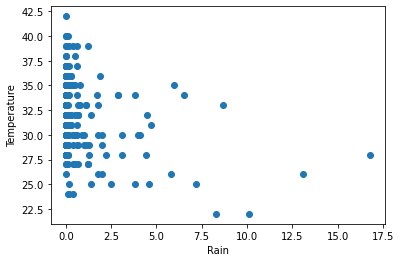

In [40]:
plt.scatter(df1['Rain'],df1['Temperature'])
plt.xlabel("Rain")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

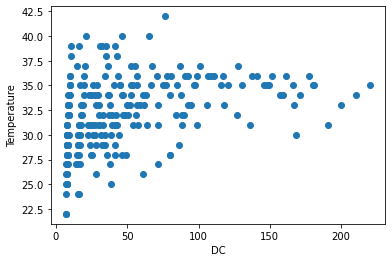

In [41]:
plt.scatter(df1['DC'],df1['Temperature'])
plt.xlabel("DC")
plt.ylabel("Temperature")

Text(0, 0.5, 'Rain')

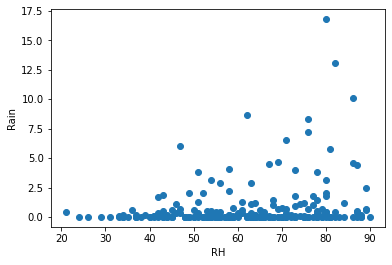

In [42]:
plt.scatter(df1['RH'],df1['Rain'])
plt.xlabel('RH')
plt.ylabel('Rain')

Text(0, 0.5, 'Temperature')

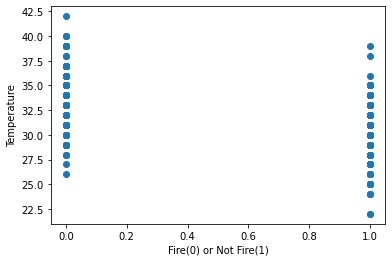

In [43]:
plt.scatter(df1['Classes'],df1['Temperature'])
plt.xlabel('Fire(0) or Not Fire(1)')
plt.ylabel('Temperature')

Text(0, 0.5, 'RH')

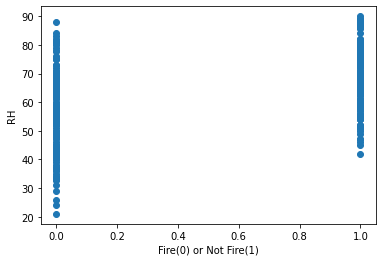

In [44]:
plt.scatter(df1['Classes'],df1['RH'])
plt.xlabel('Fire(0) or Not Fire(1)')
plt.ylabel('RH')

* Forest condition when it's maximum and lowestTemp

In [45]:
df1[df1.Temperature == (df1.Temperature.max())]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
201,17,8,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,0


In [46]:
df1[df1.Temperature == (df1.Temperature.min())]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
93,2,9,22,86,15,10.1,30.5,0.7,7.0,0.0,1.1,0.0,1
105,14,9,22,76,26,8.3,47.4,1.1,7.0,0.4,1.6,0.1,1


Classes is 0 means it's Fire on the day of Max Temp and on Minimum temp day it's raining and also not Fire.

* Plotting Pie chart to check Fire and Not Fire ratio.

In [47]:
Class_percent=df1.Classes.value_counts(normalize=True)*100
Class_percent

0    56.557377
1    43.442623
Name: Classes, dtype: float64

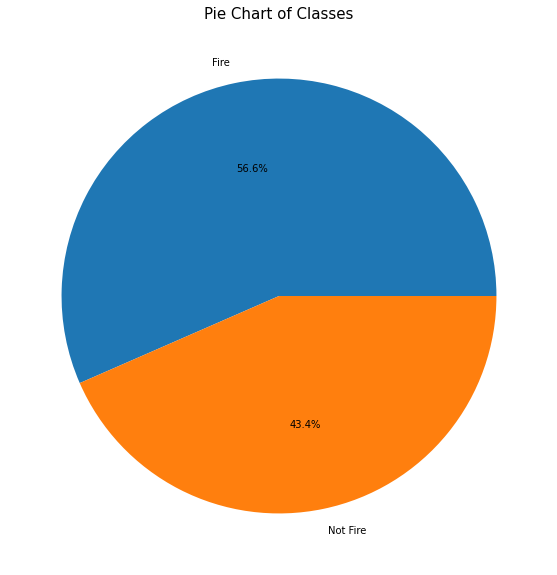

In [48]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(Class_percent,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

Thus on 57% days in Dataset , Forest is on fire.

# Outlier Handling

In [49]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


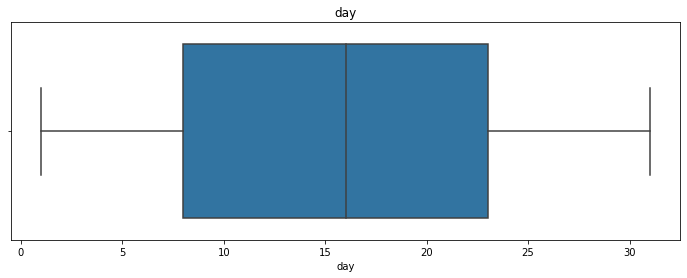

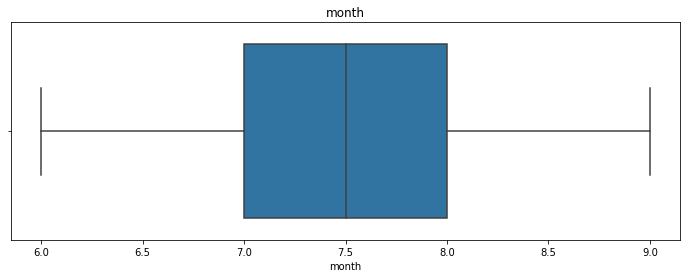

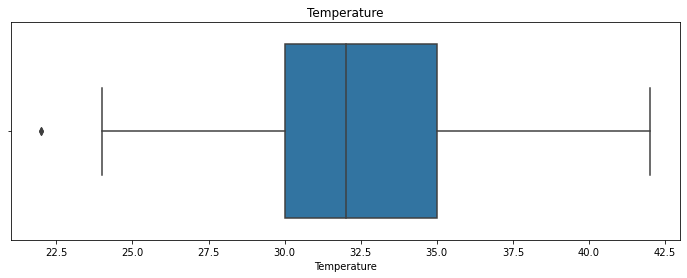

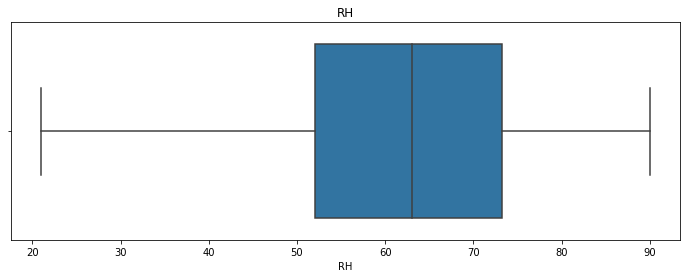

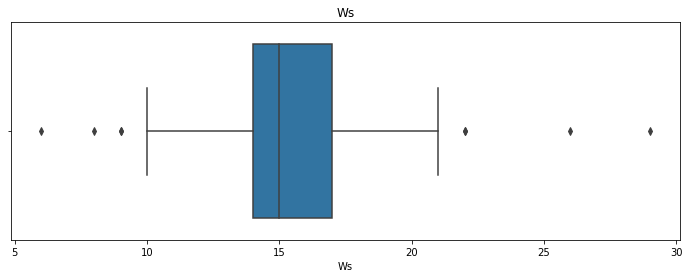

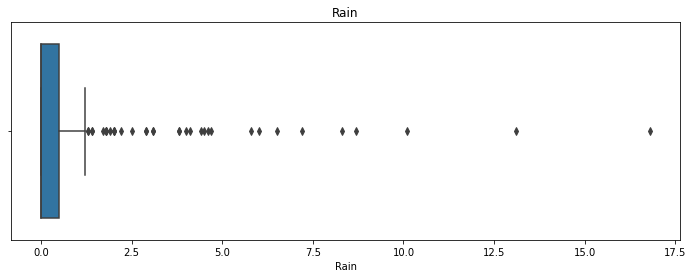

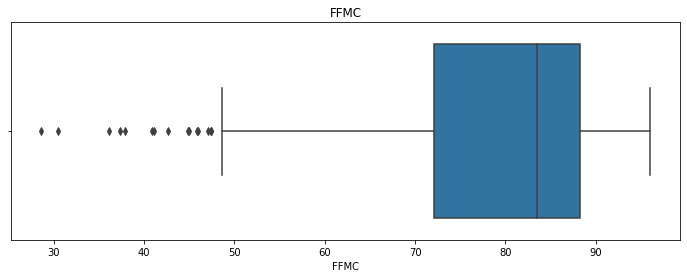

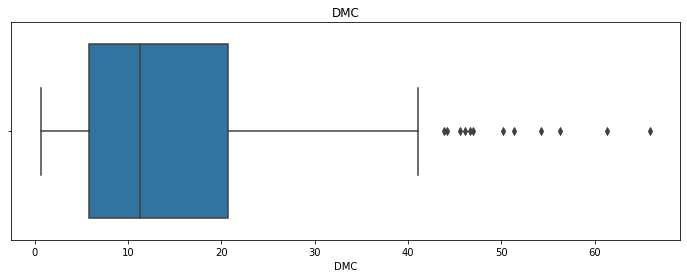

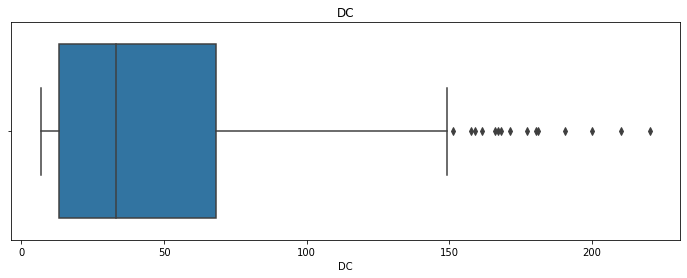

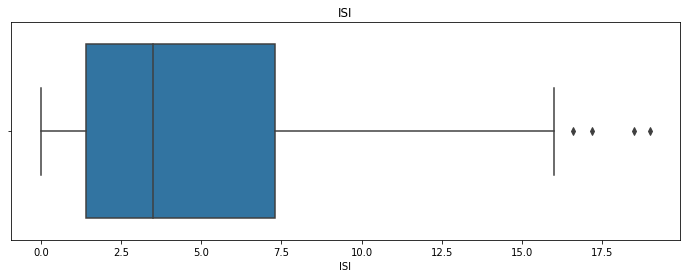

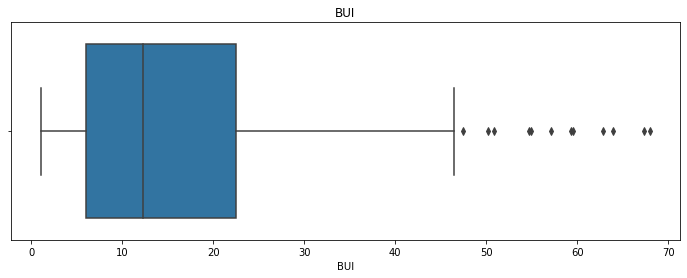

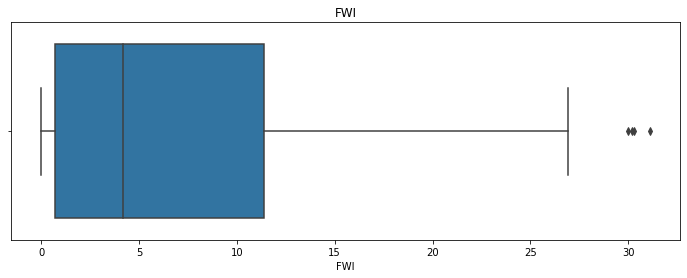

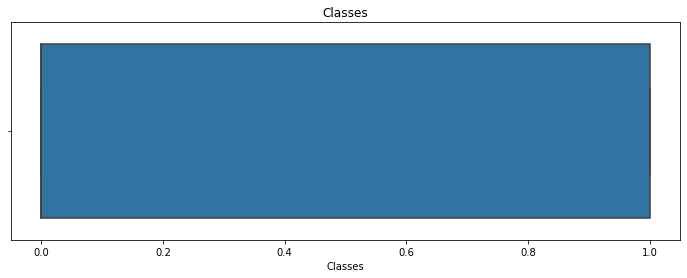

In [50]:
for i in df1.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df1[i])
    plt.title(i)

In [47]:
df2 = df1.copy()

In [52]:
def outlier_remove_IQR(column):
  # Finding outliers
  percentile_25 = df2[column].quantile(.25)
  percentile_75 = df2[column].quantile(.72)
  IQR = percentile_75 - percentile_25
  upper_lmt = percentile_75 + 1.5*IQR
  lower_lmt = percentile_25 - 1.5*IQR
  print('25 Percentile : ',percentile_25)
  print('75 percentile : ',percentile_75)
  print('Upper limit is : ',upper_lmt)
  print('Lower limit is : ',lower_lmt)
  print('IQR is : ',IQR)
  df2[column] = np.where(df2[column]>upper_lmt,upper_lmt,np.where(df2[column]<lower_lmt,lower_lmt,df2[column]))
  #return df2[df2[column] > upper_lmt]
  #return df2[df2[column]<lower_lmt]


In [53]:
def comparison_plot(df1,df2,column):
    # Comparing data of before and after outlier handling
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.distplot(df1[column])

    plt.subplot(2,2,2)
    sns.boxplot(df1[column])

    plt.subplot(2,2,3)
    sns.distplot(df2[column])

    plt.subplot(2,2,4)
    sns.boxplot(df2[column])

    plt.show()

* Passing columns with outliers one by one.

In [54]:
outlier_remove_IQR('Temperature')

25 Percentile :  30.0
75 percentile :  35.0
Upper limit is :  42.5
Lower limit is :  22.5
IQR is :  5.0


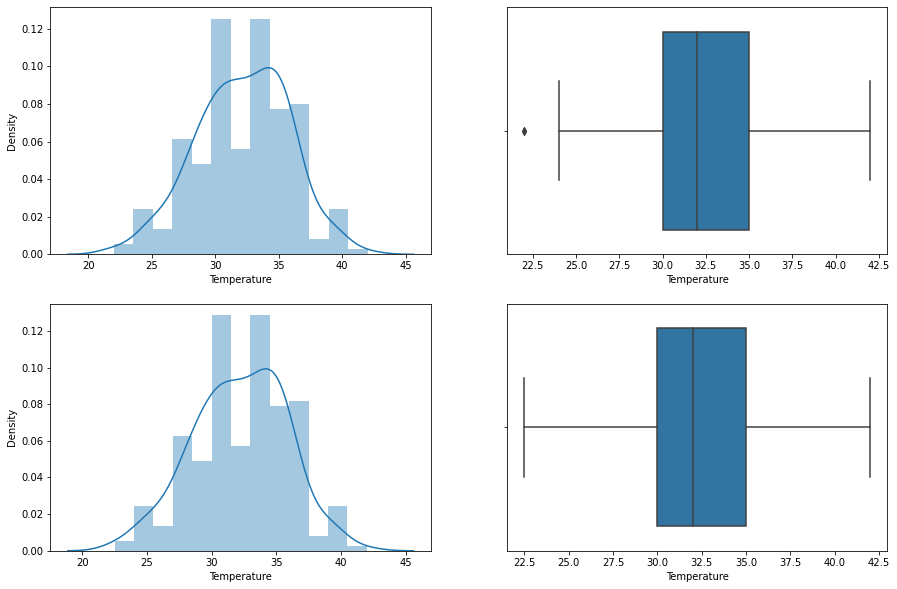

In [55]:
comparison_plot(df1,df2,'Temperature')

In [56]:
outlier_remove_IQR('Ws')

25 Percentile :  14.0
75 percentile :  17.0
Upper limit is :  21.5
Lower limit is :  9.5
IQR is :  3.0


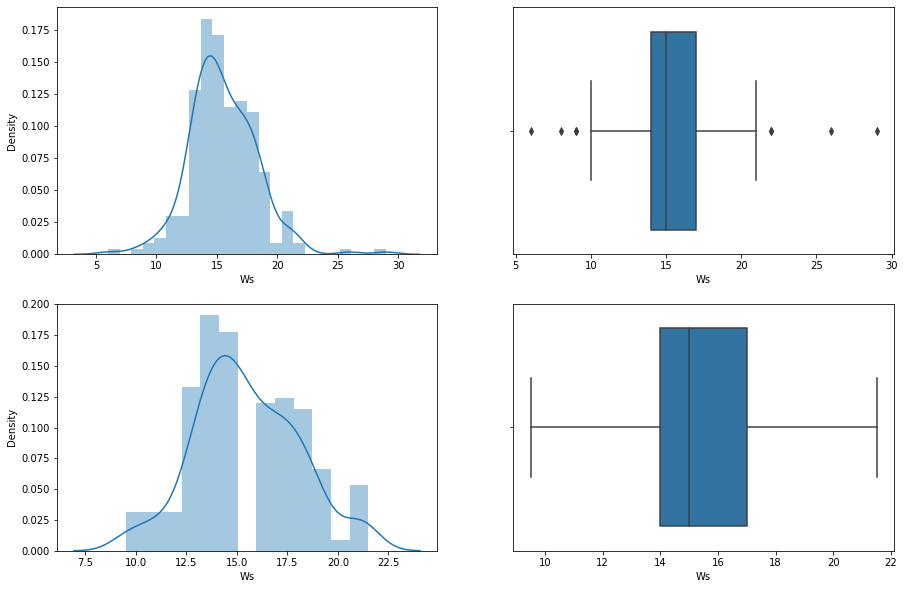

In [57]:
comparison_plot(df1,df2,'Ws')

In [58]:
outlier_remove_IQR('Rain')

25 Percentile :  0.0
75 percentile :  0.4
Upper limit is :  1.0
Lower limit is :  -0.6000000000000001
IQR is :  0.4


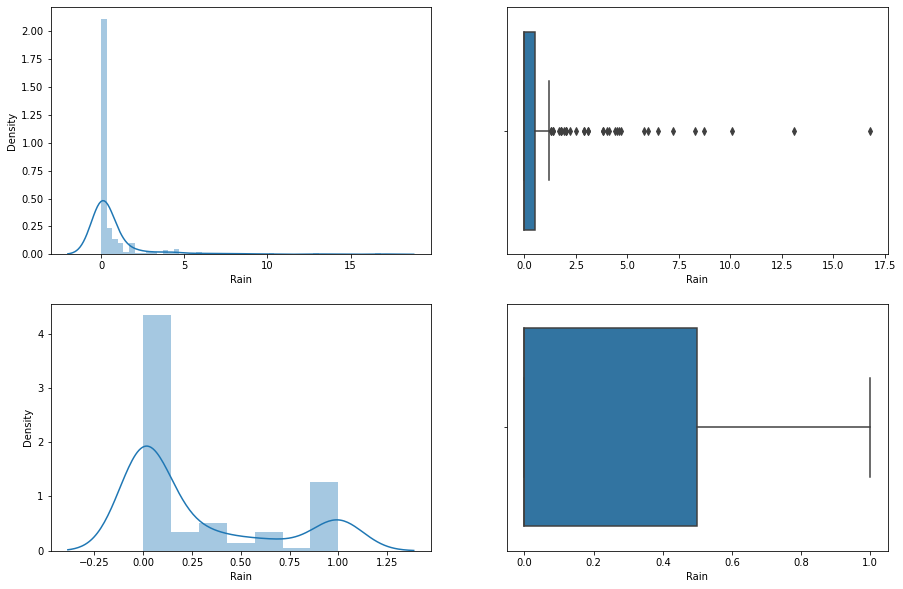

In [59]:
comparison_plot(df1,df2,'Rain')

In [60]:
outlier_remove_IQR('FFMC')

25 Percentile :  72.075
75 percentile :  87.8
Upper limit is :  111.38749999999999
Lower limit is :  48.48750000000001
IQR is :  15.724999999999994


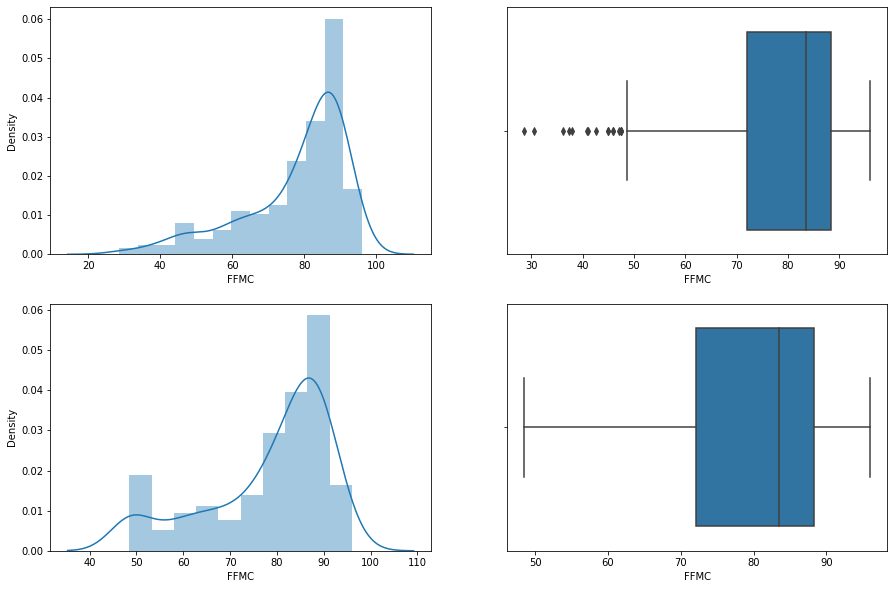

In [61]:
comparison_plot(df1,df2,'FFMC')

In [62]:
outlier_remove_IQR('DMC')

25 Percentile :  5.8
75 percentile :  18.596
Upper limit is :  37.79
Lower limit is :  -13.393999999999998
IQR is :  12.796


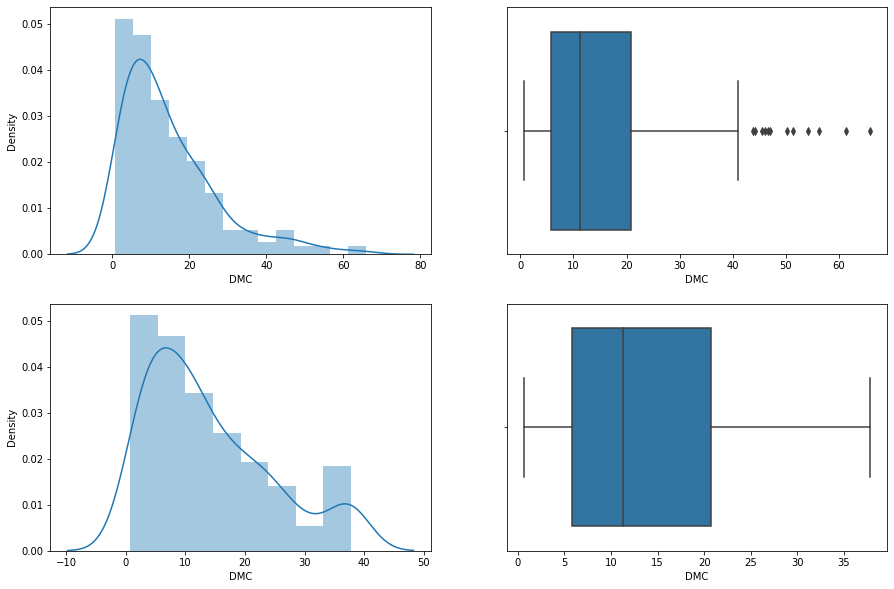

In [63]:
comparison_plot(df1,df2,'DMC')

In [64]:
outlier_remove_IQR('DC')

25 Percentile :  13.274999999999999
75 percentile :  61.023999999999965
Upper limit is :  132.64749999999992
Lower limit is :  -58.34849999999995
IQR is :  47.74899999999997


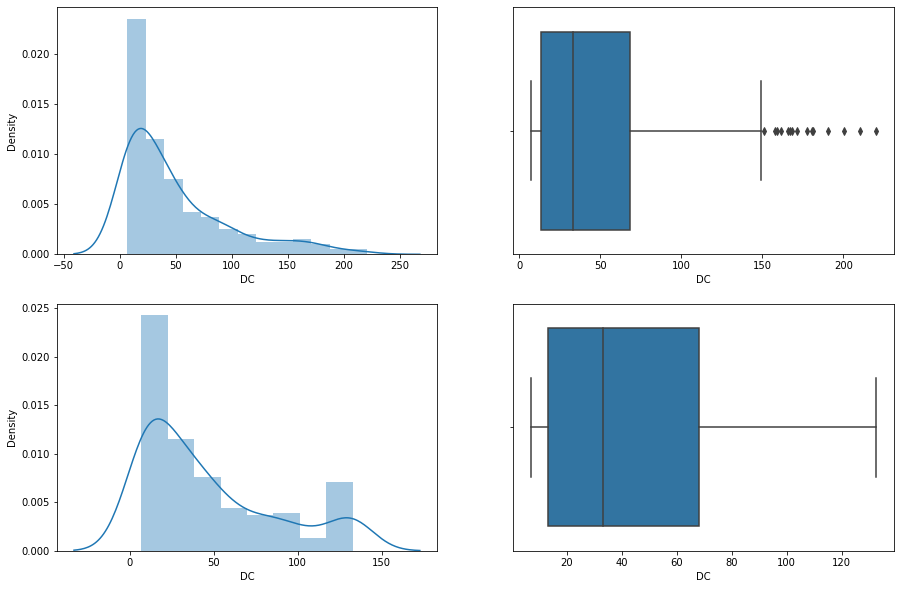

In [65]:
comparison_plot(df1,df2,'DC')

In [66]:
outlier_remove_IQR('ISI')

25 Percentile :  1.4
75 percentile :  6.895999999999998
Upper limit is :  15.139999999999997
Lower limit is :  -6.843999999999998
IQR is :  5.495999999999999


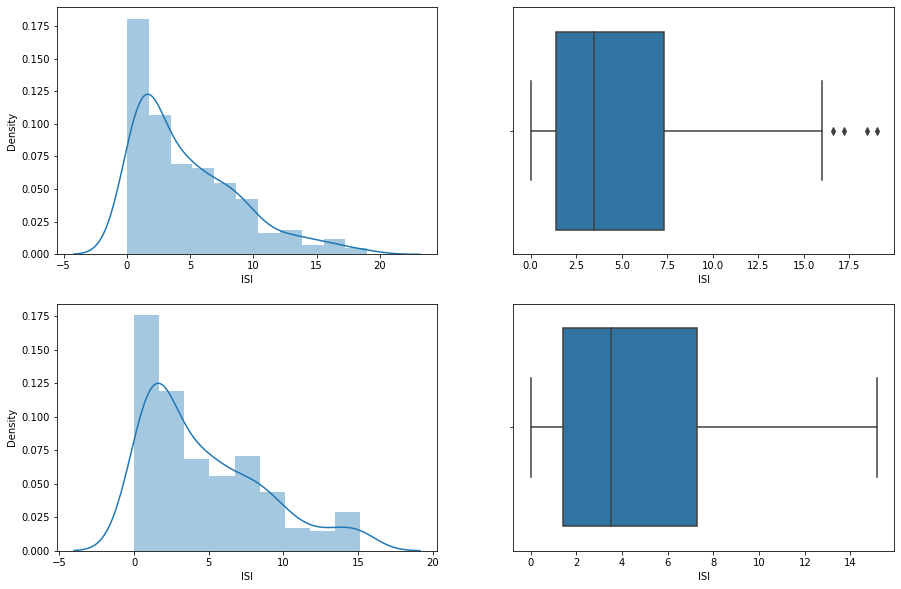

In [67]:
comparison_plot(df1,df2,'ISI')

In [68]:
outlier_remove_IQR('BUI')

25 Percentile :  6.0
75 percentile :  21.695999999999998
Upper limit is :  45.239999999999995
Lower limit is :  -17.543999999999997
IQR is :  15.695999999999998


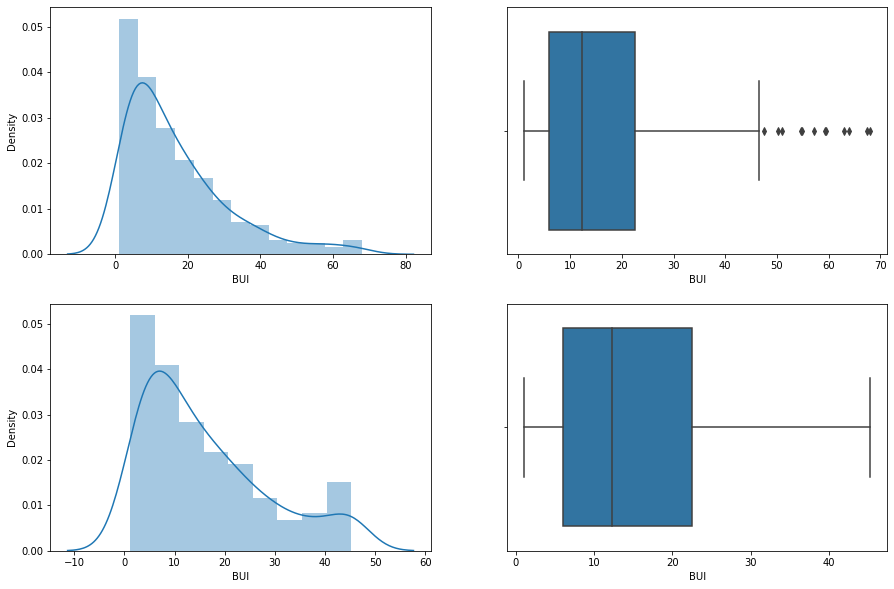

In [69]:
comparison_plot(df1,df2,'BUI')

In [70]:
outlier_remove_IQR('FWI')

25 Percentile :  0.7
75 percentile :  10.491999999999996
Upper limit is :  25.179999999999993
Lower limit is :  -13.987999999999996
IQR is :  9.791999999999996


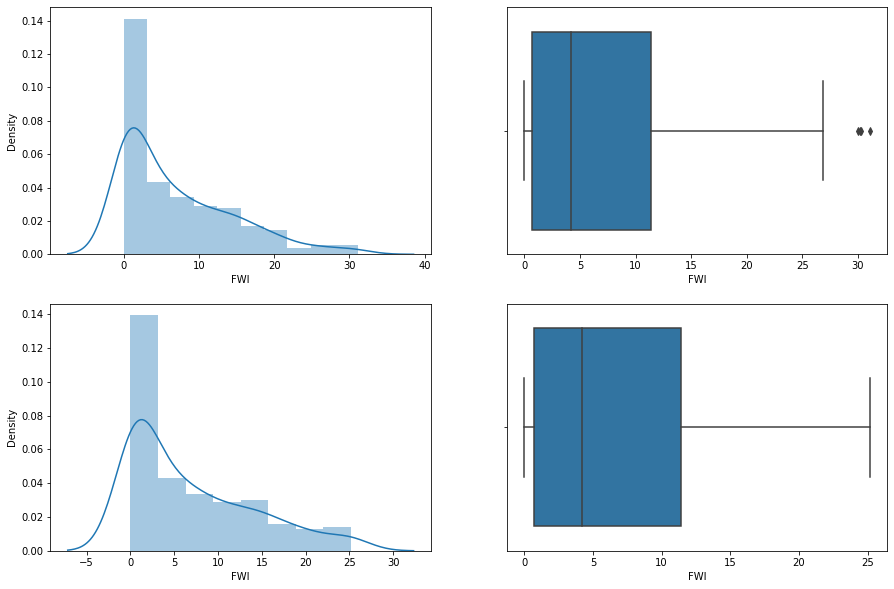

In [71]:
comparison_plot(df1,df2,'FWI')

* Checking for outlier in the dataset 

* Thus we have removed the outliers from the data

* Comparing skewness in the data before and after removing of the outlier .

In [72]:
df1.skew()

day            0.002806
month          0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479056
ISI            1.121975
BUI            1.459069
FWI            1.152413
Classes        0.266220
dtype: float64

In [73]:
df2.skew()

day            0.002806
month          0.000000
Temperature   -0.175783
RH            -0.237964
Ws             0.177613
Rain           1.091023
FFMC          -1.053409
DMC            0.881892
DC             0.989917
ISI            0.952392
BUI            0.958234
FWI            0.983117
Classes        0.266220
dtype: float64

Insights
 * It's clear form data that the skewness is decreased after outliers removals 

In [74]:
df2

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29.0,57,18.0,0.0,65.7000,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29.0,61,13.0,1.0,64.4000,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26.0,82,21.5,1.0,48.4875,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25.0,89,13.0,1.0,48.4875,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27.0,77,16.0,0.0,64.8000,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30.0,65,14.0,0.0,85.4000,16.0,44.5,4.5,16.9,6.5,0
242,27,9,28.0,87,15.0,1.0,48.4875,6.5,8.0,0.1,6.2,0.0,1
243,28,9,27.0,87,21.5,0.5,48.4875,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24.0,54,18.0,0.1,79.7000,4.3,15.2,1.7,5.1,0.7,1


# Model Training

In [48]:
# Seperating Train and test data from each other from dataframe which has no outlier df2.

X = df2.drop('Temperature',axis=1)
Y = df2['Temperature']

In [49]:
X

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
242,27,9,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
243,28,9,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [50]:
Y

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 244, dtype: int64

In [51]:
# Importing library to split Training and test datset 
from sklearn.model_selection import train_test_split

In [52]:
# Spliting Training and Test data

X_train ,  X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=.33,random_state=10)

In [53]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,24,9,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,1
78,18,8,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,0
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0
126,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1
178,25,7,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,0
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1
230,15,9,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,0
127,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1


In [54]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
164,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,1
60,31,7,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,0
61,1,8,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,1
63,3,8,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,1
69,9,8,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
171,18,7,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,0
234,19,9,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,0
146,23,6,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1
210,26,8,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,0


In [55]:
#  Standardization or feature scaling of dataset

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [56]:
X_train = Scaler.fit_transform(X_train)

In [57]:
X_test = Scaler.transform(X_test)

In [58]:
X_train

array([[ 1.0627621 ,  1.33562856, -0.85631108, ..., -0.32535487,
        -0.85646355,  1.06992376],
       [ 0.34495731,  0.44338489, -0.52508491, ...,  0.76565444,
         1.21986827, -0.93464604],
       [ 1.30203036, -1.34110244,  0.13736742, ...,  0.35302912,
         0.49249088, -0.93464604],
       ...,
       [-0.01394508,  1.33562856, -0.72382061, ...,  0.08727045,
         0.38669053, -0.93464604],
       [-1.32992053, -1.34110244,  0.13736742, ..., -0.76595478,
        -0.77711329,  1.06992376],
       [-0.61211574, -1.34110244,  1.13104591, ..., -0.27639932,
        -0.79033833,  1.06992376]])

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression()

In [61]:
# Training our model

regression.fit(X_train,Y_train)

LinearRegression()

In [62]:
print(regression.coef_)

[-0.14661531 -0.30355165 -1.27878537 -0.59637846 -0.18842349  0.92466315
  0.56004396  0.97016102  0.39779598 -0.81846766 -0.39723962 -0.20786622]


In [63]:
print(regression.intercept_)

32.17791411042945


In [64]:
reg_predict = regression.predict(X_test)

In [65]:
reg_predict

array([31.72300997, 33.44074247, 33.45607118, 31.68711693, 33.07034384,
       34.81150974, 33.84427873, 33.93831574, 32.29427557, 33.44879333,
       33.55456381, 27.18548402, 35.26640517, 29.08887731, 32.29610683,
       32.12472727, 34.72489265, 27.39070247, 36.06789775, 34.38553162,
       33.4519307 , 33.74993824, 33.96296564, 33.03662513, 35.89299823,
       28.96751794, 32.54091857, 32.30790784, 26.93043329, 32.44107766,
       25.42002757, 26.53748731, 34.72592728, 32.00509382, 33.35195659,
       30.08924543, 29.19672185, 32.2721232 , 27.23072586, 35.61369527,
       32.58616707, 33.95424439, 34.21259251, 31.0389231 , 36.40856864,
       34.23917572, 24.51881549, 35.19045406, 33.99773349, 29.10861093,
       31.6856777 , 32.74225692, 35.49572596, 32.87947159, 29.90214305,
       29.887169  , 32.80707249, 36.2713181 , 31.20097152, 33.0913011 ,
       32.67898614, 32.93794444, 31.66320664, 25.28064395, 31.48098453,
       36.30796895, 29.15062279, 29.91099711, 34.83770848, 33.87

In [66]:
residual = Y_test - reg_predict

In [67]:
residual

164    2.276990
60     1.559258
61     2.543929
63     3.312883
69     1.929656
         ...   
171    0.390993
234   -7.110827
146    1.485564
210   -3.350640
105   -2.544018
Name: Temperature, Length: 81, dtype: float64

Text(0, 0.5, 'Predicted value')

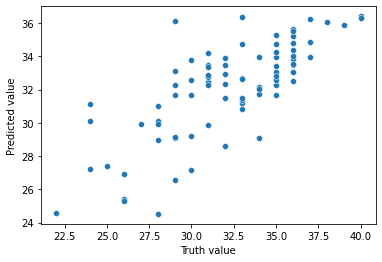

In [87]:
# Plotting Graph b/w Y_test and Predicted value

sns.scatterplot(Y_test,reg_predict)
plt.xlabel('Truth value')
plt.ylabel('Predicted value')

Text(0, 0.5, 'Predicted value')

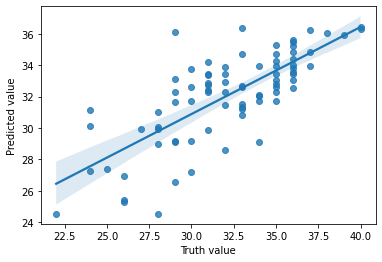

In [88]:
# Plotting best fir line b/w Y test and Predicted value.

sns.regplot(Y_test,reg_predict)
plt.xlabel('Truth value')
plt.ylabel('Predicted value')

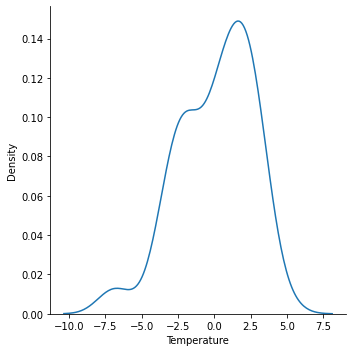

In [70]:
# Plotting Kde plot for residual to check the distribution

sns.displot(residual,kind ='kde')

Text(0, 0.5, 'Residual of truth and predicted value')

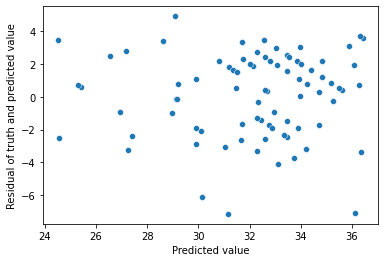

In [100]:
# Plotting scatter plot b/w predicted value and residuals

sns.scatterplot(reg_predict,residual)
plt.xlabel('Predicted value')
plt.ylabel('Residual of truth and predicted value')

In [72]:
# Calculating Mean sqaued and Mean absolute error.
# Performance matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test,reg_predict))
print(mean_absolute_error(Y_test,reg_predict))
print(np.sqrt(mean_squared_error(Y_test,reg_predict)))



6.535897700561759
2.1277343772492356
2.5565401816833937


In [73]:
# Calculating R square and Adjusted R sqaure

from sklearn.metrics import r2_score

score = r2_score(Y_test,reg_predict)
print(score)

0.5677999474552429


We need to test the model with Adjusted R square .

As we increase no of features R square value is increased , thus it's feature dependent which is not in case of Adjusted r Square

In [74]:
# Adjusted R- Sq

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.49152934994734465

# Ridge Regression

In [75]:
# To reduce Over fitting in the dataset we use ridge regression

In [76]:
from sklearn.linear_model import Ridge

In [77]:
ridge = Ridge()

In [78]:
# Training the model

ridge.fit(X_train,Y_train)

Ridge()

In [79]:
print(ridge.coef_)
print(ridge.intercept_)

[-0.14303126 -0.29514961 -1.27527174 -0.59513945 -0.19502241  0.91567283
  0.23638511  0.76874925  0.3808555  -0.31434695 -0.37158809 -0.19937642]
32.17791411042945


In [80]:
# Making prediction from test data

ridge_predict = ridge.predict(X_test)

In [81]:
ridge_predict

array([31.72536807, 33.468404  , 33.45014918, 31.69290156, 33.07015671,
       34.8547354 , 33.8245938 , 33.85659502, 32.28413909, 33.42929308,
       33.5345447 , 27.20962164, 35.24167619, 29.08235587, 32.28455822,
       32.11550728, 34.69052307, 27.43683257, 36.08176623, 34.38922438,
       33.43331503, 33.72831263, 33.96589151, 33.02510782, 35.88205058,
       28.97660287, 32.47342807, 32.34049358, 26.96830882, 32.45839164,
       25.43739681, 26.57217116, 34.69113989, 32.00924399, 33.34495655,
       30.09909501, 29.18458819, 32.263896  , 27.26737702, 35.61525694,
       32.60332059, 33.93731837, 34.2186614 , 31.02701158, 36.39310703,
       34.24046868, 24.5154041 , 35.1957735 , 33.99238121, 29.12573555,
       31.66594634, 32.73446822, 35.51440283, 32.85204852, 29.91919451,
       29.87551444, 32.81063616, 36.28682279, 31.19574323, 33.08183051,
       32.66993542, 32.95312151, 31.6523191 , 25.24095399, 31.4959161 ,
       36.27502469, 29.15658707, 29.8969273 , 34.85744008, 33.84

In [92]:
residual1 = Y_test - ridge_predict

In [83]:
residual1

164    2.274632
60     1.531596
61     2.549851
63     3.307098
69     1.929843
         ...   
171    0.389844
234   -7.122168
146    1.470697
210   -3.350588
105   -2.550281
Name: Temperature, Length: 81, dtype: float64

Text(0, 0.5, 'Predicted value')

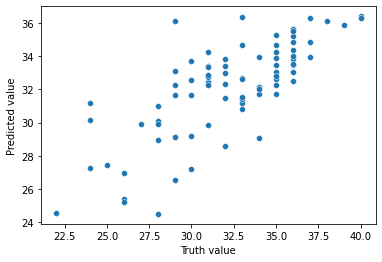

In [89]:
# Plotting graph b/w Y_test and ridge predicted value

sns.scatterplot(Y_test,ridge_predict)
plt.xlabel('Truth value')
plt.ylabel('Predicted value')

Text(0, 0.5, 'Ridge prediction')

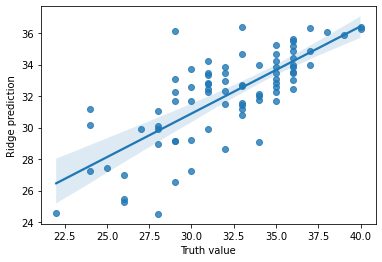

In [90]:
# Plotting Best fit line b/w Y_test and Predicted value

sns.regplot(Y_test,ridge_predict)
plt.xlabel('Truth value')
plt.ylabel('Ridge prediction')

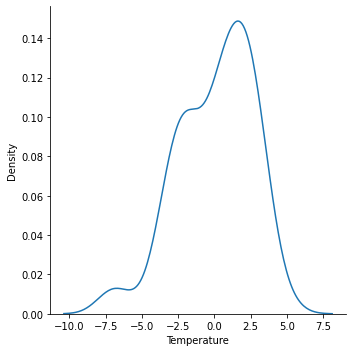

In [93]:
# Plotting Kde plot to check distribution of residual

sns.displot(residual1,kind ='kde')

Text(0, 0.5, 'Residual value')

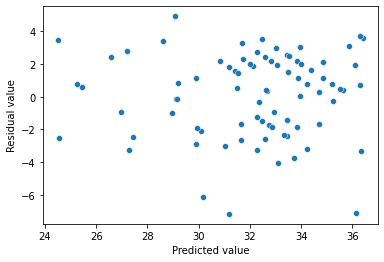

In [99]:
sns.scatterplot(ridge_predict,residual1)
plt.xlabel('Predicted value')
plt.ylabel('Residual value')

In [107]:
# performance matrix

print(mean_squared_error(Y_test,ridge_predict))
print(mean_absolute_error(Y_test,ridge_predict))
print(np.sqrt(mean_squared_error(Y_test,ridge_predict)))

6.5480713880065675
2.128693953409474
2.558919965142827


In [108]:
# R - squared value calculation

score1 = r2_score(Y_test,ridge_predict)
print(score1)

0.5669949366373934


In [109]:
# Calculating R sqaure

1 - (1-score1)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.49058227839693347

In [110]:
# Calculating Adjusted R - sq

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.49152934994734465

# Lasso Regression

We use lasso to reduce feature which are least corelated

In [111]:
from sklearn.linear_model import Lasso

In [114]:
lasso = Lasso()

In [115]:
# Training the dataset

lasso.fit(X_train,Y_train)

Lasso()

In [116]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.         -0.         -0.71955751 -0.         -0.          0.89582004
  0.          0.          0.          0.          0.         -0.        ]
32.17791411042945


In [117]:
Lasso_predict = lasso.predict(X_test)

In [119]:
Lasso_predict

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

In [118]:
residual2 = Y_test - Lasso_predict

In [120]:
residual2

164    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
171    0.583574
234   -4.568827
146    0.882714
210   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

Text(0, 0.5, 'Predected datapoints')

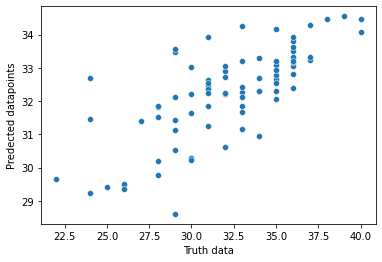

In [121]:
# Plotting graph b/w Truth and Predicted data

sns.scatterplot(Y_test,Lasso_predict)
plt.xlabel('Truth data')
plt.ylabel('Predected datapoints')

Text(0, 0.5, 'Predected data points')

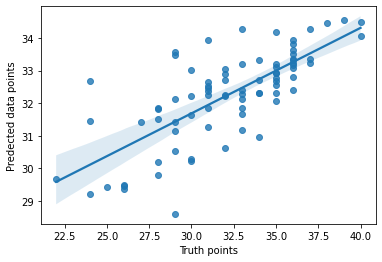

In [122]:
# Plotting best fit line b/w Truth and predected data points

sns.regplot(Y_test,Lasso_predict)
plt.xlabel('Truth points')
plt.ylabel('Predected data points')

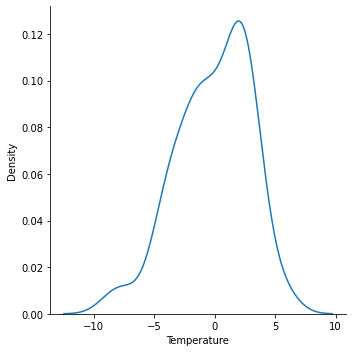

In [123]:
# Plotting distribution plot for residuals

sns.displot(residual2,kind='kde')

Text(0.5, 0, 'Predected datapoints')

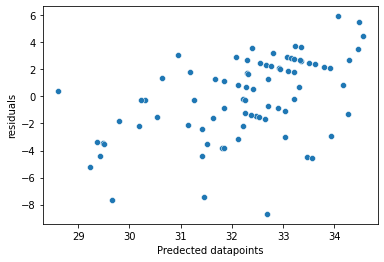

In [125]:
# Plotting Graph b/w residual and predicted points

sns.scatterplot(Lasso_predict,residual2)
plt.ylabel('residuals')
plt.xlabel('Predected datapoints')

In [126]:
# Performance matrix

print(mean_squared_error(Y_test,Lasso_predict))
print(mean_absolute_error(Y_test,Lasso_predict))
print(np.sqrt(mean_squared_error(Y_test,Lasso_predict)))

9.10609532182792
2.4978660766652734
3.0176307464346794


In [127]:
# Calculate R - sq value

score2 = r2_score(Y_test,Lasso_predict)
print(score2)

0.39784019626969913


In [128]:
# Adjusted R - sq

1 - (1-score2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.2915767014937637

# Elastic Net

In [129]:
from sklearn.linear_model import ElasticNet

In [130]:
E_net = ElasticNet()

In [131]:
E_net.fit(X_train,Y_train)

ElasticNet()

In [132]:
print(E_net.coef_)
print(E_net.intercept_)

[ 0.         -0.         -0.68684132 -0.10713782 -0.01336766  0.67115219
  0.07772847  0.          0.22408837  0.04295763  0.10650387 -0.11048912]
32.17791411042945


In [133]:
E_predict = E_net.predict(X_test)

In [134]:
residual3 = Y_test - E_predict

In [135]:
residual3

164    2.129237
60     2.012981
61     3.378654
63     3.310462
69     2.028966
         ...   
171    0.446795
234   -4.792329
146    1.314456
210   -2.273864
105   -7.101858
Name: Temperature, Length: 81, dtype: float64

Text(0, 0.5, 'Predected data points')

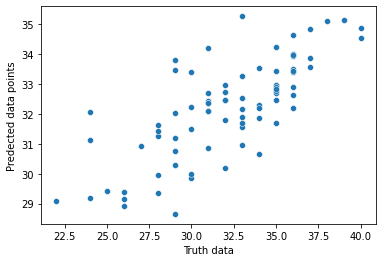

In [137]:
# Plotting Graph b/w Y_test and predicted data

sns.scatterplot(Y_test,E_predict)
plt.xlabel('Truth data')
plt.ylabel('Predected data points')

Text(0, 0.5, 'Predicted datapoints')

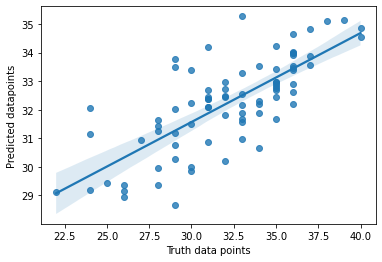

In [138]:
# Plotting best fit line b/w Y_test and predicted datapoints

sns.regplot(Y_test,E_predict)
plt.xlabel('Truth data points')
plt.ylabel('Predicted datapoints')

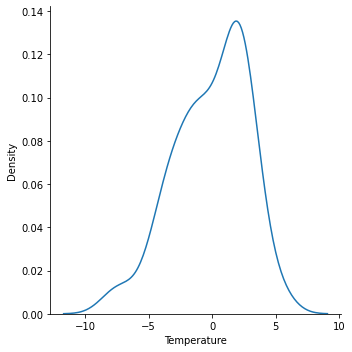

In [139]:
# Plotting distribution plot of residual

sns.displot(residual3,kind='kde')

Text(0, 0.5, 'Residual')

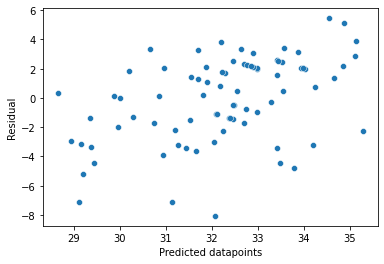

In [140]:
# Plotting Graph b/w residual and predicted points

sns.scatterplot(E_predict,residual3)
plt.xlabel('Predicted datapoints')
plt.ylabel('Residual')

In [141]:
# Performance matrix

print(mean_squared_error(Y_test, E_predict))
print(mean_absolute_error(Y_test,E_predict))
print(np.sqrt(mean_squared_error(Y_test,E_predict)))

8.293768778564825
2.3935636762415173
2.8798904108602508


In [142]:
# Calculating R - sq value

score3 = r2_score(Y_test,E_predict)
print(score3)

0.4515570062270573


In [143]:
# Calculating Adjusted R -sq value

1 - (1-score3)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.35477294850242036